<a href="https://colab.research.google.com/github/paliwalpiyush151/ML_Genre_Classification/blob/main/Code_data_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import brown
import pandas as pd
import os,sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nltk.download('brown') # Dataset 

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
def n_adj(text):
    adj=0
    for i in text:
        if i[0] == 'J':
            adj=adj+1
    return adj

def n_noun(text):
    noun=0
    for i in text:
        if ((i[0] == 'N') and (i[1] != 'C')):
            noun=noun+1
    return noun

def n_verb(text):
    verb=0
    for i in text:
        if i[0] == 'V':
            verb=verb+1
    return verb

def n_pronoun(text):
    pronoun=0
    for i in text:
        if (i[0] == 'P') or (i[:3] in ['WP$','WPO','WPS']):
            pronoun=pronoun+1
    return pronoun

def n_adv(text):
    adv=0
    for i in text:
        if (i[0] == 'R') or (i[:3] in ['WRB']):
            adv=adv+1
    return adv

In [ ]:
brownpostable=pd.DataFrame(columns=['Category','Filename','ADJ','ADV','NOUN','VERB','PRON'])  # Pandas dataframe 
bncpostable=pd.DataFrame(columns=['Category','Filename','ADJ','ADV','NOUN','VERB','PRON'])

In [ ]:

for i in brown.categories():
    for j in brown.fileids(categories=i):
        taggedwords=brown.tagged_words(j)
        taglist=[]
        for k in taggedwords:
            taglist.append(k[1])
        adj=n_adj(taglist)
        adv=n_adv(taglist)
        noun=n_noun(taglist)
        verb=n_verb(taglist)
        pronoun=n_pronoun(taglist)
        brownpostable=brownpostable.append({'Category' : i,'Filename' : j, 'ADJ' : int(adj), 'ADV' : int(adv), 'NOUN' : int(noun), 'VERB' : int(verb), 'PRON' : int(pronoun)},ignore_index=True)

In [ ]:
brownpostable

,Category,Filename,ADJ,ADV,NOUN,VERB,PRON
0,adventure,cn01,72,134,390,321,329
1,adventure,cn02,71,144,423,328,312
2,adventure,cn03,58,98,487,352,219
3,adventure,cn04,121,116,466,320,242
4,adventure,cn05,74,142,363,301,339
...,...,...,...,...,...,...,...
495,science_fiction,cm02,128,116,463,255,177
496,science_fiction,cm03,109,135,415,223,205
497,science_fiction,cm04,125,134,422,265,244
498,science_fiction,cm05,183,84,531,247,181


In [ ]:

#brownpostable['length'] = None
brownpostable['ADJrPRON']=None     # Division : ratio
brownpostable['ADJpPRON']=None     # Addition : plus
brownpostable['ADJmPRON']=None     #  Substraction : absolute value : m = minus
brownpostable['ADJiPRON']=None     # Multiplication of two features 
brownpostable['ADJrVERB']=None
brownpostable['ADJpVERB']=None
brownpostable['ADJmVERB']=None
brownpostable['ADJiVERB']=None
brownpostable['ADJrNOUN']=None
brownpostable['ADJpNOUN']=None
brownpostable['ADJmNOUN']=None
brownpostable['ADJiNOUN']=None
brownpostable['ADVrADJ']=None
brownpostable['ADVpADJ']=None
brownpostable['ADVmADJ']=None     # The most important feature
brownpostable['ADViADJ']=None
brownpostable['ADVrNOUN']=None
brownpostable['ADVpNOUN']=None
brownpostable['ADVmNOUN']=None
brownpostable['ADViNOUN']=None
brownpostable['ADVrPRON']=None
brownpostable['ADVpPRON']=None
brownpostable['ADVmPRON']=None
brownpostable['ADViPRON']=None
brownpostable['ADVrVERB']=None
brownpostable['ADVpVERB']=None
brownpostable['ADVmVERB']=None
brownpostable['ADViVERB']=None
brownpostable['NOUNrVERB']=None
brownpostable['NOUNpVERB']=None
brownpostable['NOUNmVERB']=None
brownpostable['NOUNiVERB']=None
brownpostable['NOUNrPRON']=None
brownpostable['NOUNpPRON']=None
brownpostable['NOUNmPRON']=None
brownpostable['NOUNiPRON']=None
brownpostable['VERBrPRON']=None
brownpostable['VERBpPRON']=None
brownpostable['VERBmPRON']=None
brownpostable['VERBiPRON']=None

In [ ]:
len(brownpostable)  # Dataset length 

500

In [ ]:
brownpostable.head(200)

,Category,Filename,ADJ,ADV,NOUN,VERB,PRON,ADJrPRON,ADJpPRON,ADJmPRON,ADJiPRON,ADJrVERB,ADJpVERB,ADJmVERB,ADJiVERB,ADJrNOUN,ADJpNOUN,ADJmNOUN,ADJiNOUN,ADVrADJ,ADVpADJ,ADVmADJ,ADViADJ,ADVrNOUN,ADVpNOUN,ADVmNOUN,ADViNOUN,ADVrPRON,ADVpPRON,ADVmPRON,ADViPRON,ADVrVERB,ADVpVERB,ADVmVERB,ADViVERB,NOUNrVERB,NOUNpVERB,NOUNmVERB,NOUNiVERB,NOUNrPRON,NOUNpPRON,NOUNmPRON,NOUNiPRON,VERBrPRON,VERBpPRON,VERBmPRON,VERBiPRON
0,adventure,cn01,72,134,390,321,329,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,adventure,cn02,71,144,423,328,312,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,adventure,cn03,58,98,487,352,219,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,adventure,cn04,121,116,466,320,242,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,adventure,cn05,74,142,363,301,339,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,hobbies,ce06,154,95,570,210,71,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
196,hobbies,ce07,105,72,596,314,44,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
197,hobbies,ce08,104,59,604,217,66,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
198,hobbies,ce09,137,75,688,162,101,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
# To fill value in columns 
for i in range(len(brownpostable)):
    adj=brownpostable.ADJ.iloc[i]
    adv=brownpostable.ADV.iloc[i]
    noun=brownpostable.NOUN.iloc[i]
    verb=brownpostable.VERB.iloc[i]
    pronoun=brownpostable.PRON.iloc[i]
    brownpostable.ADJrPRON.iloc[i]=adj/pronoun
    brownpostable.ADJpPRON.iloc[i]=adj+pronoun
    brownpostable.ADJmPRON.iloc[i]=abs(adj-pronoun)
    brownpostable.ADJiPRON.iloc[i]=adj*pronoun
    brownpostable.ADVrADJ.iloc[i]=adv/adj
    brownpostable.ADVpADJ.iloc[i]=adv+adj
    brownpostable.ADVmADJ.iloc[i]=abs(adv-adj)
    brownpostable.ADViADJ.iloc[i]=adv*adj
    brownpostable.ADJrVERB.iloc[i]=adj/verb
    brownpostable.ADJpVERB.iloc[i]=adj+verb
    brownpostable.ADJmVERB.iloc[i]=abs(adj-verb)
    brownpostable.ADJiVERB.iloc[i]=adj*verb
    brownpostable.ADJrNOUN.iloc[i]=adj/noun
    brownpostable.ADJpNOUN.iloc[i]=adj+noun
    brownpostable.ADJmNOUN.iloc[i]=abs(adj-noun)
    brownpostable.ADJiNOUN.iloc[i]=adj*noun
    brownpostable.ADVrNOUN.iloc[i]=adv/noun
    brownpostable.ADVpNOUN.iloc[i]=adv+noun
    brownpostable.ADVmNOUN.iloc[i]=abs(adv-noun)
    brownpostable.ADViNOUN.iloc[i]=adv*noun
    brownpostable.ADVrPRON.iloc[i]=adv/pronoun
    brownpostable.ADVpPRON.iloc[i]=adv+pronoun
    brownpostable.ADVmPRON.iloc[i]=abs(adv-pronoun)
    brownpostable.ADViPRON.iloc[i]=adv*pronoun
    brownpostable.ADVrVERB.iloc[i]=adv/verb
    brownpostable.ADVpVERB.iloc[i]=adv+verb
    brownpostable.ADVmVERB.iloc[i]=abs(adv-verb)
    brownpostable.ADViVERB.iloc[i]=adv*verb
    brownpostable.NOUNrVERB.iloc[i]=noun/verb
    brownpostable.NOUNpVERB.iloc[i]=noun+verb
    brownpostable.NOUNiVERB.iloc[i]=noun*verb
    brownpostable.NOUNmVERB.iloc[i]=abs(noun-verb)
    brownpostable.NOUNrPRON.iloc[i]=noun/pronoun
    brownpostable.NOUNpPRON.iloc[i]=noun+pronoun
    brownpostable.NOUNmPRON.iloc[i]=abs(noun-pronoun)
    brownpostable.NOUNiPRON.iloc[i]=noun*pronoun
    brownpostable.VERBrPRON.iloc[i]=verb/pronoun
    brownpostable.VERBpPRON.iloc[i]=verb+pronoun
    brownpostable.VERBmPRON.iloc[i]=abs(verb-pronoun)
    brownpostable.VERBiPRON.iloc[i]=verb*pronoun

In [ ]:
pal = brownpostable.drop('Filename',axis = 1)
#brownpostable.columns = brownpostable.columns.str.strip()

In [ ]:
brownpostable

,Category,Filename,ADJ,ADV,NOUN,VERB,PRON,ADJrPRON,ADJpPRON,ADJmPRON,ADJiPRON,ADJrVERB,ADJpVERB,ADJmVERB,ADJiVERB,ADJrNOUN,ADJpNOUN,ADJmNOUN,ADJiNOUN,ADVrADJ,ADVpADJ,ADVmADJ,ADViADJ,ADVrNOUN,ADVpNOUN,ADVmNOUN,ADViNOUN,ADVrPRON,ADVpPRON,ADVmPRON,ADViPRON,ADVrVERB,ADVpVERB,ADVmVERB,ADViVERB,NOUNrVERB,NOUNpVERB,NOUNmVERB,NOUNiVERB,NOUNrPRON,NOUNpPRON,NOUNmPRON,NOUNiPRON,VERBrPRON,VERBpPRON,VERBmPRON,VERBiPRON
0,adventure,cn01,72,134,390,321,329,0.218845,401,257,23688,0.224299,393,249,23112,0.184615,462,318,28080,1.86111,206,62,9648,0.34359,524,256,52260,0.407295,463,195,44086,0.417445,455,187,43014,1.21495,711,69,125190,1.18541,719,61,128310,0.975684,650,8,105609
1,adventure,cn02,71,144,423,328,312,0.227564,383,241,22152,0.216463,399,257,23288,0.167849,494,352,30033,2.02817,215,73,10224,0.340426,567,279,60912,0.461538,456,168,44928,0.439024,472,184,47232,1.28963,751,95,138744,1.35577,735,111,131976,1.05128,640,16,102336
2,adventure,cn03,58,98,487,352,219,0.26484,277,161,12702,0.164773,410,294,20416,0.119097,545,429,28246,1.68966,156,40,5684,0.201232,585,389,47726,0.447489,317,121,21462,0.278409,450,254,34496,1.38352,839,135,171424,2.22374,706,268,106653,1.60731,571,133,77088
3,adventure,cn04,121,116,466,320,242,0.5,363,121,29282,0.378125,441,199,38720,0.259657,587,345,56386,0.958678,237,5,14036,0.248927,582,350,54056,0.479339,358,126,28072,0.3625,436,204,37120,1.45625,786,146,149120,1.92562,708,224,112772,1.32231,562,78,77440
4,adventure,cn05,74,142,363,301,339,0.218289,413,265,25086,0.245847,375,227,22274,0.203857,437,289,26862,1.91892,216,68,10508,0.391185,505,221,51546,0.418879,481,197,48138,0.471761,443,159,42742,1.20598,664,62,109263,1.0708,702,24,123057,0.887906,640,38,102039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,science_fiction,cm02,128,116,463,255,177,0.723164,305,49,22656,0.501961,383,127,32640,0.276458,591,335,59264,0.90625,244,12,14848,0.25054,579,347,53708,0.655367,293,61,20532,0.454902,371,139,29580,1.81569,718,208,118065,2.61582,640,286,81951,1.44068,432,78,45135
496,science_fiction,cm03,109,135,415,223,205,0.531707,314,96,22345,0.488789,332,114,24307,0.262651,524,306,45235,1.23853,244,26,14715,0.325301,550,280,56025,0.658537,340,70,27675,0.605381,358,88,30105,1.86099,638,192,92545,2.02439,620,210,85075,1.0878,428,18,45715
497,science_fiction,cm04,125,134,422,265,244,0.512295,369,119,30500,0.471698,390,140,33125,0.296209,547,297,52750,1.072,259,9,16750,0.317536,556,288,56548,0.54918,378,110,32696,0.50566,399,131,35510,1.59245,687,157,111830,1.72951,666,178,102968,1.08607,509,21,64660
498,science_fiction,cm05,183,84,531,247,181,1.01105,364,2,33123,0.740891,430,64,45201,0.344633,714,348,97173,0.459016,267,99,15372,0.158192,615,447,44604,0.464088,265,97,15204,0.340081,331,163,20748,2.1498,778,284,131157,2.9337,712,350,96111,1.36464,428,66,44707


In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

0


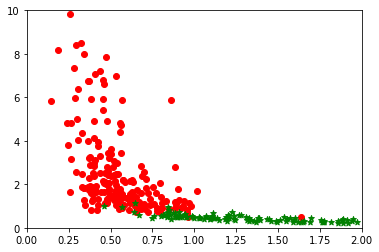

In [ ]:
# Visualizing data on the scale of two features : ADJ/PRON and ADV/ADJ
# Similar visualization can be done on other feature ratios as well to observe the boundary line between two categories.
# We should visualize combination of different features and then proceed for testing differnet models : 

plt.xlim(0,2)
plt.ylim(0,10)
count = 0
for i in ['news','reviews','government','learned','hobbies']:
    y=brownpostable[brownpostable.Category == i].ADJrPRON
    x=brownpostable[brownpostable.Category == i].ADVrADJ
    plt.scatter(x,y,c='red')
    #plt.show()
    
for i in ['fiction','mystery','science_fiction','adventure','romance']:
    y=brownpostable[brownpostable.Category == i].ADJrPRON
    x=brownpostable[brownpostable.Category == i].ADVrADJ
    plt.scatter(x,y,marker="*",c='green')
#plt.show()
print(count)

In [ ]:
brownpostable

,Category,Filename,ADJ,ADV,NOUN,VERB,PRON,ADJrPRON,ADJpPRON,ADJmPRON,ADJiPRON,ADJrVERB,ADJpVERB,ADJmVERB,ADJiVERB,ADJrNOUN,ADJpNOUN,ADJmNOUN,ADJiNOUN,ADVrADJ,ADVpADJ,ADVmADJ,ADViADJ,ADVrNOUN,ADVpNOUN,ADVmNOUN,ADViNOUN,ADVrPRON,ADVpPRON,ADVmPRON,ADViPRON,ADVrVERB,ADVpVERB,ADVmVERB,ADViVERB,NOUNrVERB,NOUNpVERB,NOUNmVERB,NOUNiVERB,NOUNrPRON,NOUNpPRON,NOUNmPRON,NOUNiPRON,VERBrPRON,VERBpPRON,VERBmPRON,VERBiPRON
0,adventure,cn01,72,134,390,321,329,0.218845,401,257,23688,0.224299,393,249,23112,0.184615,462,318,28080,1.86111,206,62,9648,0.34359,524,256,52260,0.407295,463,195,44086,0.417445,455,187,43014,1.21495,711,69,125190,1.18541,719,61,128310,0.975684,650,8,105609
1,adventure,cn02,71,144,423,328,312,0.227564,383,241,22152,0.216463,399,257,23288,0.167849,494,352,30033,2.02817,215,73,10224,0.340426,567,279,60912,0.461538,456,168,44928,0.439024,472,184,47232,1.28963,751,95,138744,1.35577,735,111,131976,1.05128,640,16,102336
2,adventure,cn03,58,98,487,352,219,0.26484,277,161,12702,0.164773,410,294,20416,0.119097,545,429,28246,1.68966,156,40,5684,0.201232,585,389,47726,0.447489,317,121,21462,0.278409,450,254,34496,1.38352,839,135,171424,2.22374,706,268,106653,1.60731,571,133,77088
3,adventure,cn04,121,116,466,320,242,0.5,363,121,29282,0.378125,441,199,38720,0.259657,587,345,56386,0.958678,237,5,14036,0.248927,582,350,54056,0.479339,358,126,28072,0.3625,436,204,37120,1.45625,786,146,149120,1.92562,708,224,112772,1.32231,562,78,77440
4,adventure,cn05,74,142,363,301,339,0.218289,413,265,25086,0.245847,375,227,22274,0.203857,437,289,26862,1.91892,216,68,10508,0.391185,505,221,51546,0.418879,481,197,48138,0.471761,443,159,42742,1.20598,664,62,109263,1.0708,702,24,123057,0.887906,640,38,102039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,science_fiction,cm02,128,116,463,255,177,0.723164,305,49,22656,0.501961,383,127,32640,0.276458,591,335,59264,0.90625,244,12,14848,0.25054,579,347,53708,0.655367,293,61,20532,0.454902,371,139,29580,1.81569,718,208,118065,2.61582,640,286,81951,1.44068,432,78,45135
496,science_fiction,cm03,109,135,415,223,205,0.531707,314,96,22345,0.488789,332,114,24307,0.262651,524,306,45235,1.23853,244,26,14715,0.325301,550,280,56025,0.658537,340,70,27675,0.605381,358,88,30105,1.86099,638,192,92545,2.02439,620,210,85075,1.0878,428,18,45715
497,science_fiction,cm04,125,134,422,265,244,0.512295,369,119,30500,0.471698,390,140,33125,0.296209,547,297,52750,1.072,259,9,16750,0.317536,556,288,56548,0.54918,378,110,32696,0.50566,399,131,35510,1.59245,687,157,111830,1.72951,666,178,102968,1.08607,509,21,64660
498,science_fiction,cm05,183,84,531,247,181,1.01105,364,2,33123,0.740891,430,64,45201,0.344633,714,348,97173,0.459016,267,99,15372,0.158192,615,447,44604,0.464088,265,97,15204,0.340081,331,163,20748,2.1498,778,284,131157,2.9337,712,350,96111,1.36464,428,66,44707


###Fiction Categories : fiction, mystery, romance,adventure, and science fiction  
###Nonfiction Categories : news, hobbies, government, reviews, and learned

In [ ]:
rg = [{'ADJ','ADV','NOUN','VERB','PRON','ADJrPRON','ADJpPRON','ADJmPRON','ADJiPRON','ADJrVERB','ADJpVERB','ADJmVERB','ADJiVERB','ADJrNOUN','ADJpNOUN','ADJmNOUN','ADJiNOUN','ADVrADJ','ADVpADJ','ADVmADJ','ADViADJ','ADVrNOUN','ADVpNOUN','ADVmNOUN','ADViNOUN','ADVrPRON','ADVpPRON','ADVmPRON','ADViPRON','ADVrVERB','ADVpVERB','ADVmVERB','ADViVERB','NOUNrVERB','NOUNpVERB','NOUNmVERB','NOUNiVERB','NOUNrPRON','NOUNpPRON','NOUNmPRON','NOUNiPRON','VERBrPRON','VERBpPRON','VERBmPRON','VERBiPRON'}]
column = brownpostable[{'ADJ','ADV','NOUN','VERB','PRON','ADJrPRON','ADJpPRON','ADJmPRON','ADJiPRON','ADJrVERB','ADJpVERB','ADJmVERB','ADJiVERB','ADJrNOUN','ADJpNOUN','ADJmNOUN','ADJiNOUN','ADVrADJ','ADVpADJ','ADVmADJ','ADViADJ','ADVrNOUN','ADVpNOUN','ADVmNOUN','ADViNOUN','ADVrPRON','ADVpPRON','ADVmPRON','ADViPRON','ADVrVERB','ADVpVERB','ADVmVERB','ADViVERB','NOUNrVERB','NOUNpVERB','NOUNmVERB','NOUNiVERB','NOUNrPRON','NOUNpPRON','NOUNmPRON','NOUNiPRON','VERBrPRON','VERBpPRON','VERBmPRON','VERBiPRON'}]
max_value = column.max()
print(max_value)
#max_value['VERB']

ADViPRON      66267.000000
VERBmPRON       342.000000
ADVmPRON        230.000000
ADVpVERB        531.000000
ADViADJ       27612.000000
ADJ             269.000000
ADJmVERB        303.000000
ADJiPRON      46656.000000
ADVrVERB          0.874074
NOUNrVERB         7.592308
VERBrPRON        43.400000
ADJrNOUN          0.517928
ADJiNOUN     177171.000000
ADJpVERB        494.000000
NOUNmPRON       910.000000
VERBiPRON    126655.000000
ADVrNOUN          0.631746
NOUNiPRON    144672.000000
ADJrVERB          1.549296
ADJiVERB      59987.000000
ADVrADJ           3.145455
ADVpADJ         361.000000
NOUN            987.000000
ADVrPRON         10.600000
ADVmVERB        272.000000
NOUNpVERB      1117.000000
NOUNpPRON      1064.000000
ADJpNOUN       1075.000000
ADVmADJ         225.000000
NOUNrPRON       139.000000
ADVmNOUN        946.000000
ADViVERB      63879.000000
VERBpPRON       712.000000
NOUNmVERB       857.000000
ADJmNOUN        899.000000
ADJpPRON        488.000000
ADVpPRON        532.000000
A

In [ ]:
# Classifying into fiction and nonficiton categories:
arr = brownpostable['Category']
for i in range(len(arr)):
  if (arr[i]== 'adventure' or arr[i]=='science_fiction' or arr[i]=='romance' or arr[i]=='mystery' or arr[i]=='fiction'):
    arr[i] = 1  # Fiction 
  elif (arr[i]=='humour' or arr[i]=='editorial' or arr[i]=='lore' or arr[i]=='religion' or arr[i]=='belles_lettres'):
    arr[i] = -1  # In between 
  else:
    arr[i] = 0  # Nonfiction 

In [ ]:
paliwal= brownpostable.drop('Filename',axis = 1)
paliwal

,Category,ADJ,ADV,NOUN,VERB,PRON,ADJrPRON,ADJpPRON,ADJmPRON,ADJiPRON,ADJrVERB,ADJpVERB,ADJmVERB,ADJiVERB,ADJrNOUN,ADJpNOUN,ADJmNOUN,ADJiNOUN,ADVrADJ,ADVpADJ,ADVmADJ,ADViADJ,ADVrNOUN,ADVpNOUN,ADVmNOUN,ADViNOUN,ADVrPRON,ADVpPRON,ADVmPRON,ADViPRON,ADVrVERB,ADVpVERB,ADVmVERB,ADViVERB,NOUNrVERB,NOUNpVERB,NOUNmVERB,NOUNiVERB,NOUNrPRON,NOUNpPRON,NOUNmPRON,NOUNiPRON,VERBrPRON,VERBpPRON,VERBmPRON,VERBiPRON
0,1,72,134,390,321,329,0.218845,401,257,23688,0.224299,393,249,23112,0.184615,462,318,28080,1.86111,206,62,9648,0.34359,524,256,52260,0.407295,463,195,44086,0.417445,455,187,43014,1.21495,711,69,125190,1.18541,719,61,128310,0.975684,650,8,105609
1,1,71,144,423,328,312,0.227564,383,241,22152,0.216463,399,257,23288,0.167849,494,352,30033,2.02817,215,73,10224,0.340426,567,279,60912,0.461538,456,168,44928,0.439024,472,184,47232,1.28963,751,95,138744,1.35577,735,111,131976,1.05128,640,16,102336
2,1,58,98,487,352,219,0.26484,277,161,12702,0.164773,410,294,20416,0.119097,545,429,28246,1.68966,156,40,5684,0.201232,585,389,47726,0.447489,317,121,21462,0.278409,450,254,34496,1.38352,839,135,171424,2.22374,706,268,106653,1.60731,571,133,77088
3,1,121,116,466,320,242,0.5,363,121,29282,0.378125,441,199,38720,0.259657,587,345,56386,0.958678,237,5,14036,0.248927,582,350,54056,0.479339,358,126,28072,0.3625,436,204,37120,1.45625,786,146,149120,1.92562,708,224,112772,1.32231,562,78,77440
4,1,74,142,363,301,339,0.218289,413,265,25086,0.245847,375,227,22274,0.203857,437,289,26862,1.91892,216,68,10508,0.391185,505,221,51546,0.418879,481,197,48138,0.471761,443,159,42742,1.20598,664,62,109263,1.0708,702,24,123057,0.887906,640,38,102039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,128,116,463,255,177,0.723164,305,49,22656,0.501961,383,127,32640,0.276458,591,335,59264,0.90625,244,12,14848,0.25054,579,347,53708,0.655367,293,61,20532,0.454902,371,139,29580,1.81569,718,208,118065,2.61582,640,286,81951,1.44068,432,78,45135
496,1,109,135,415,223,205,0.531707,314,96,22345,0.488789,332,114,24307,0.262651,524,306,45235,1.23853,244,26,14715,0.325301,550,280,56025,0.658537,340,70,27675,0.605381,358,88,30105,1.86099,638,192,92545,2.02439,620,210,85075,1.0878,428,18,45715
497,1,125,134,422,265,244,0.512295,369,119,30500,0.471698,390,140,33125,0.296209,547,297,52750,1.072,259,9,16750,0.317536,556,288,56548,0.54918,378,110,32696,0.50566,399,131,35510,1.59245,687,157,111830,1.72951,666,178,102968,1.08607,509,21,64660
498,1,183,84,531,247,181,1.01105,364,2,33123,0.740891,430,64,45201,0.344633,714,348,97173,0.459016,267,99,15372,0.158192,615,447,44604,0.464088,265,97,15204,0.340081,331,163,20748,2.1498,778,284,131157,2.9337,712,350,96111,1.36464,428,66,44707


In [ ]:
brownpostable['Category'].value_counts()

 0    216
-1    167
 1    117
Name: Category, dtype: int64

In [ ]:
brownpostable['Category'].value_counts()

 0    216
-1    167
 1    117
Name: Category, dtype: int64

In [ ]:
exp = paliwal
exp.head(70)

,Category,ADJ,ADV,NOUN,VERB,PRON,ADJrPRON,ADJpPRON,ADJmPRON,ADJiPRON,ADJrVERB,ADJpVERB,ADJmVERB,ADJiVERB,ADJrNOUN,ADJpNOUN,ADJmNOUN,ADJiNOUN,ADVrADJ,ADVpADJ,ADVmADJ,ADViADJ,ADVrNOUN,ADVpNOUN,ADVmNOUN,ADViNOUN,ADVrPRON,ADVpPRON,ADVmPRON,ADViPRON,ADVrVERB,ADVpVERB,ADVmVERB,ADViVERB,NOUNrVERB,NOUNpVERB,NOUNmVERB,NOUNiVERB,NOUNrPRON,NOUNpPRON,NOUNmPRON,NOUNiPRON,VERBrPRON,VERBpPRON,VERBmPRON,VERBiPRON
0,1,72,134,390,321,329,0.218845,401,257,23688,0.224299,393,249,23112,0.184615,462,318,28080,1.86111,206,62,9648,0.34359,524,256,52260,0.407295,463,195,44086,0.417445,455,187,43014,1.21495,711,69,125190,1.18541,719,61,128310,0.975684,650,8,105609
1,1,71,144,423,328,312,0.227564,383,241,22152,0.216463,399,257,23288,0.167849,494,352,30033,2.02817,215,73,10224,0.340426,567,279,60912,0.461538,456,168,44928,0.439024,472,184,47232,1.28963,751,95,138744,1.35577,735,111,131976,1.05128,640,16,102336
2,1,58,98,487,352,219,0.26484,277,161,12702,0.164773,410,294,20416,0.119097,545,429,28246,1.68966,156,40,5684,0.201232,585,389,47726,0.447489,317,121,21462,0.278409,450,254,34496,1.38352,839,135,171424,2.22374,706,268,106653,1.60731,571,133,77088
3,1,121,116,466,320,242,0.5,363,121,29282,0.378125,441,199,38720,0.259657,587,345,56386,0.958678,237,5,14036,0.248927,582,350,54056,0.479339,358,126,28072,0.3625,436,204,37120,1.45625,786,146,149120,1.92562,708,224,112772,1.32231,562,78,77440
4,1,74,142,363,301,339,0.218289,413,265,25086,0.245847,375,227,22274,0.203857,437,289,26862,1.91892,216,68,10508,0.391185,505,221,51546,0.418879,481,197,48138,0.471761,443,159,42742,1.20598,664,62,109263,1.0708,702,24,123057,0.887906,640,38,102039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,-1,135,106,486,247,161,0.838509,296,26,21735,0.546559,382,112,33345,0.277778,621,351,65610,0.785185,241,29,14310,0.218107,592,380,51516,0.658385,267,55,17066,0.42915,353,141,26182,1.96761,733,239,120042,3.01863,647,325,78246,1.53416,408,86,39767
66,-1,117,85,585,202,149,0.785235,266,32,17433,0.579208,319,85,23634,0.2,702,468,68445,0.726496,202,32,9945,0.145299,670,500,49725,0.57047,234,64,12665,0.420792,287,117,17170,2.89604,787,383,118170,3.92617,734,436,87165,1.3557,351,53,30098
67,-1,110,104,605,237,158,0.696203,268,48,17380,0.464135,347,127,26070,0.181818,715,495,66550,0.945455,214,6,11440,0.171901,709,501,62920,0.658228,262,54,16432,0.438819,341,133,24648,2.55274,842,368,143385,3.82911,763,447,95590,1.5,395,79,37446
68,-1,112,96,571,224,203,0.551724,315,91,22736,0.5,336,112,25088,0.196147,683,459,63952,0.857143,208,16,10752,0.168126,667,475,54816,0.472906,299,107,19488,0.428571,320,128,21504,2.54911,795,347,127904,2.81281,774,368,115913,1.10345,427,21,45472


## Correlation between two features : 

In [ ]:
fea = [['ADJiPRON','ADJiVERB','ADJiNOUN','ADViADJ','ADViNOUN','ADViPRON','ADViVERB','NOUNiVERB','NOUNiPRON','VERBiPRON']]
rng = []
a = 0 
for i in range(len(fea)):
  a = max_value[fea[i]] + 5
  rng.append(a)

In [ ]:
rng

[ADJiPRON      46661.0
 ADJiVERB      59992.0
 ADJiNOUN     177176.0
 ADViADJ       27617.0
 ADViNOUN      87092.0
 ADViPRON      66272.0
 ADViVERB      63884.0
 NOUNiVERB    260872.0
 NOUNiPRON    144677.0
 VERBiPRON    126660.0
 dtype: float64]

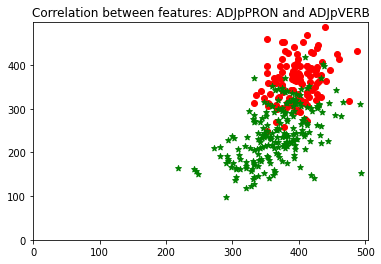

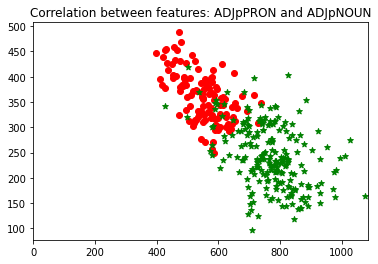

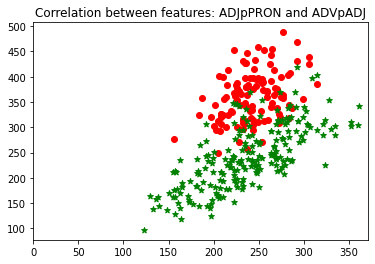

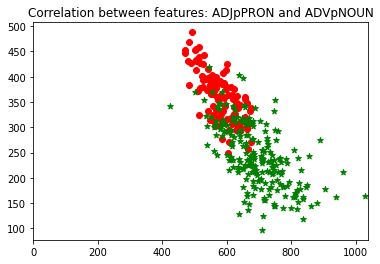

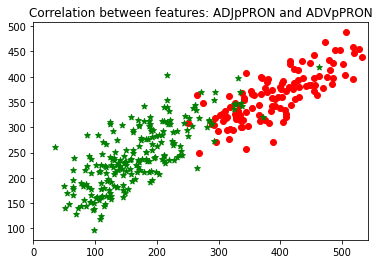

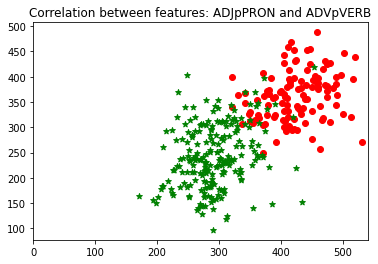

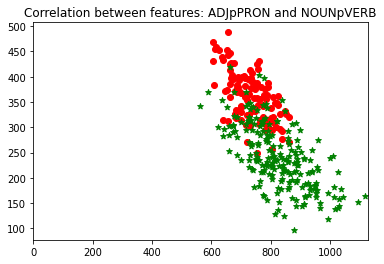

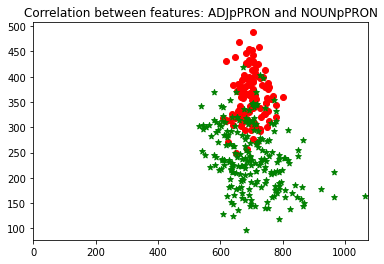

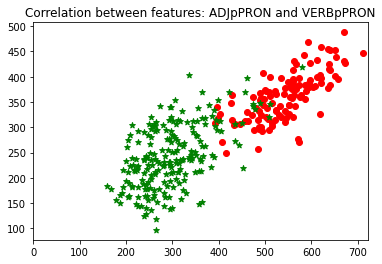

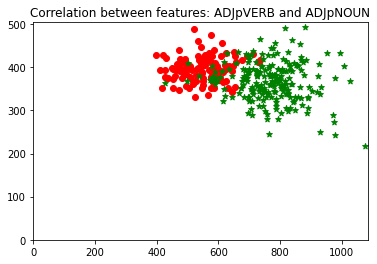

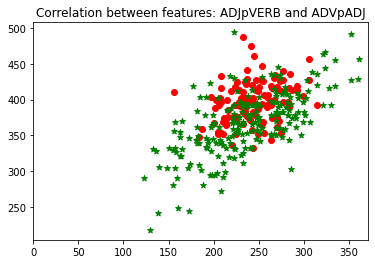

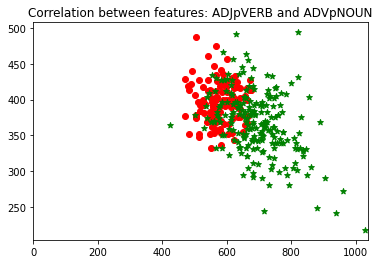

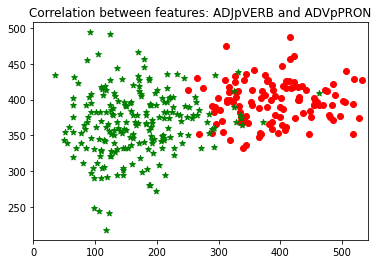

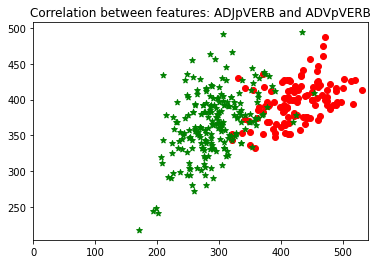

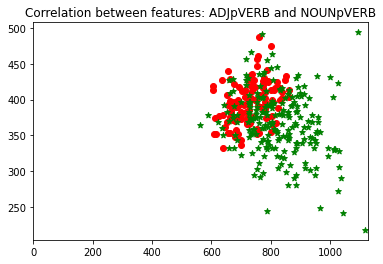

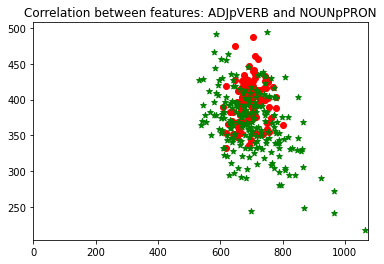

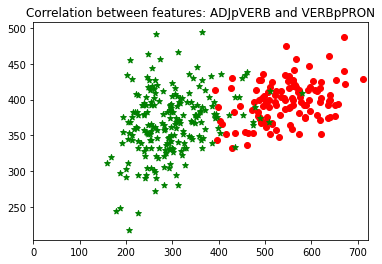

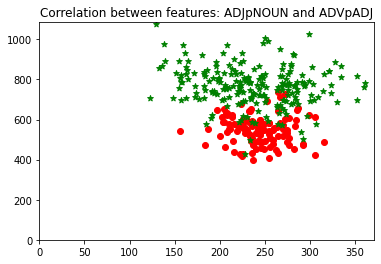

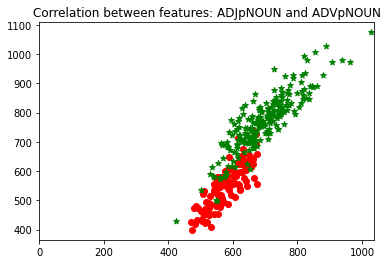

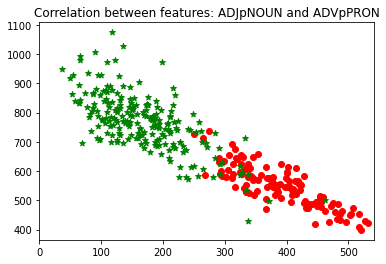

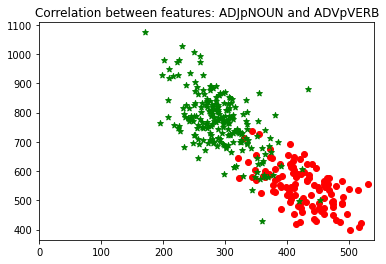

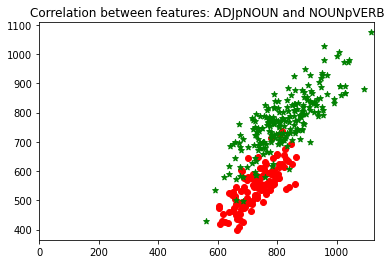

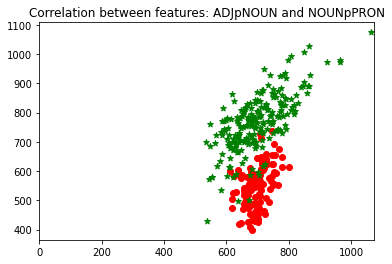

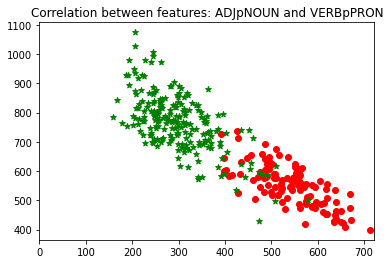

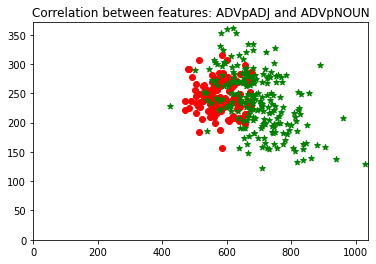

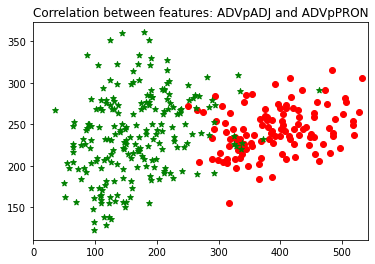

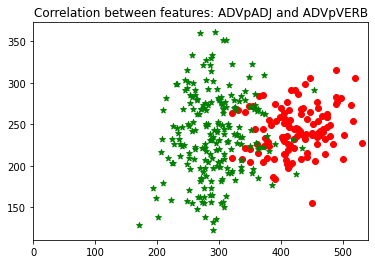

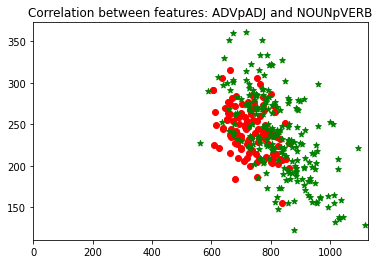

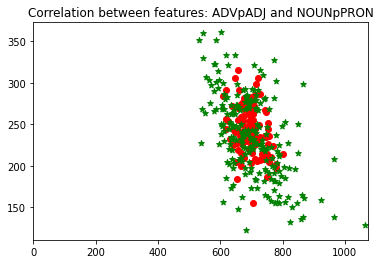

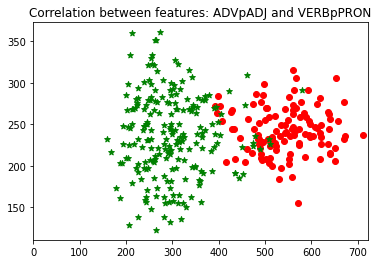

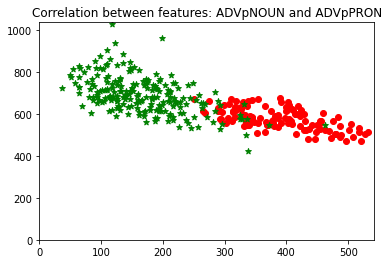

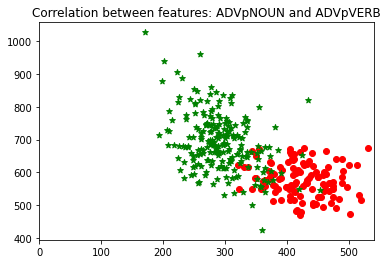

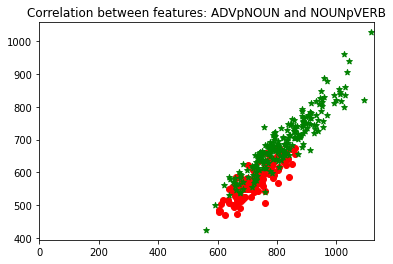

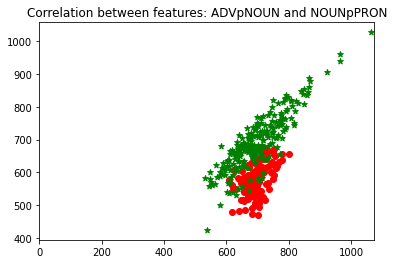

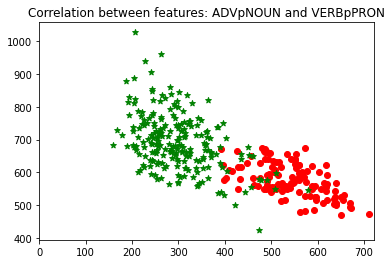

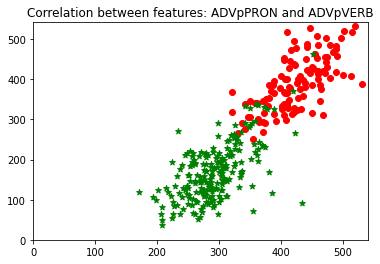

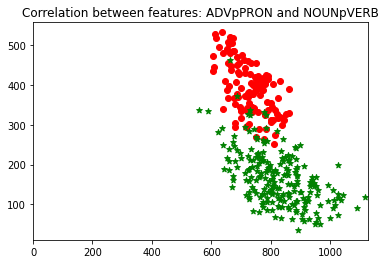

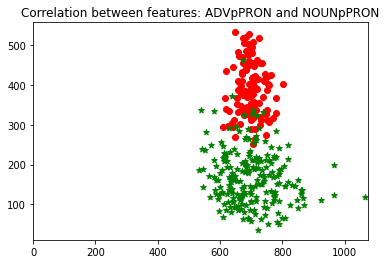

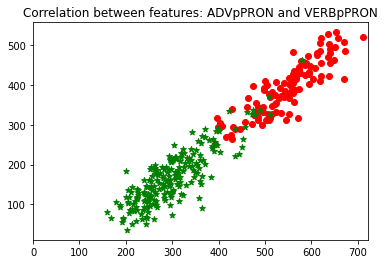

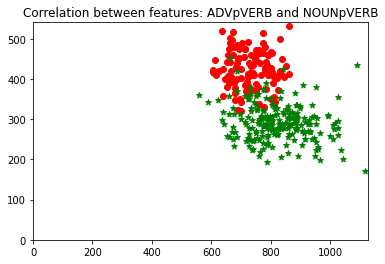

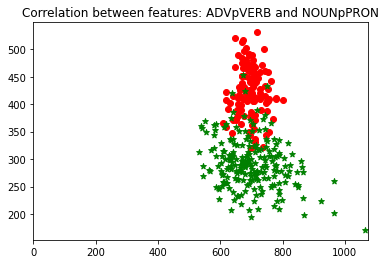

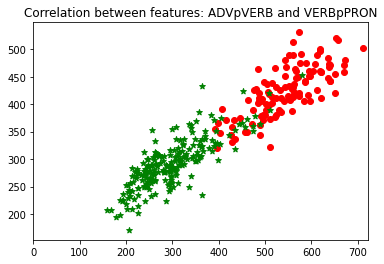

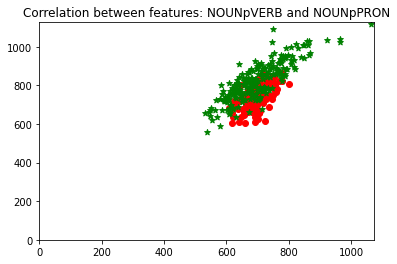

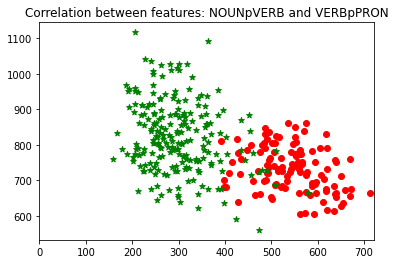

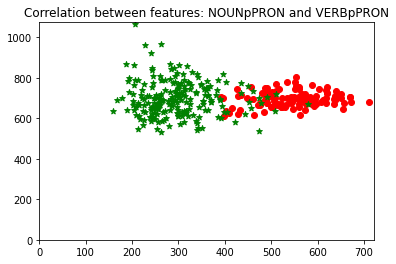

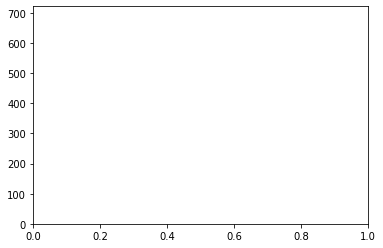

In [ ]:
from google.colab import files

#fea = ['ADJ','ADV','NOUN','VERB','PRON','ADJrPRON','ADJpPRON','ADJrVERB','ADJpVERB','ADJrNOUN','ADJpNOUN','ADVrADJ','ADVpADJ','ADVrNOUN','ADVpNOUN','ADVrPRON','ADVpPRON','ADVrVERB','ADVpVERB','NOUNrVERB','NOUNpVERB','NOUNrPRON','NOUNpPRON','VERBrPRON','VERBpPRON']
#rng = [300,250,1100,400,400,40,500,2.0,500,1.0,1100,4,400,0.8,1050,15,550,1.2,550,8.2,1140,160,1100,160,720]
#fea = ['ADJmPRON','ADJmVERB','ADJmNOUN','ADVmADJ','ADVmNOUN','ADVmPRON','ADVmVERB','NOUNmVERB','NOUNmPRON','VERBmPRON']
#rng = []

fea = ['ADJpPRON','ADJpVERB','ADJpNOUN','ADVpADJ','ADVpNOUN','ADVpPRON','ADVpVERB','NOUNpVERB','NOUNpPRON','VERBpPRON']
#fea = ['ADJ','ADV','NOUN','VERB','PRON']
#fea = ['ADJmPRON','ADJmVERB','ADJmNOUN','ADVmADJ','ADVmNOUN','ADVmPRON','ADVmVERB','NOUNmVERB','NOUNmPRON','VERBmPRON']
#fea = ['ADJiPRON','ADJiVERB','ADJiNOUN','ADViADJ','ADViNOUN','ADViPRON','ADViVERB','NOUNiVERB','NOUNiPRON','VERBiPRON']
#fea = ['ADJrPRON','ADJrVERB','ADJrNOUN','ADVrADJ','ADVrNOUN','ADVrPRON','ADVrVERB','NOUNrVERB','NOUNrPRON','VERBrPRON']
rng = []
rng_1 = []

a = 0 
for i in range(len(fea)):
  a = max_value[fea[i]] + 10
  rng.append(a)


dum = exp['Category'].tolist()
ind_po = list()
ind_mo = list()
for i in range(len(dum)):
  if dum[i]==1:
    ind_po.append(i)
  if dum[i]==0:
    ind_mo.append(i)

# plotting starts  : 
count =0 
for k in range(len(rng)):
  plt.ylim(0,rng[k])
  for p in range(k,len(rng)):
    if (p!=k):
      plt.xlim(0,rng[p])
      y=exp[fea[k]]
      x=exp[fea[p]]
      a = []
      b = []
      for i in range(len(ind_po)):
        a.append(x[ind_po[i]])
        b.append(y[ind_po[i]])
      plt.scatter(a,b,c='red')
      # plt.title("Correlation between features: %s and %s"%(fea[k],fea[p]))
      #plt.savefig("%sand%s.png"%(fea[k],fea[p]))
      #plt.show("%sand%s.png"%(fea[k],fea[p]))

      c = []
      d = []  
      for i in range(len(ind_mo)):
        c.append(x[ind_mo[i]])
        d.append(y[ind_mo[i]])
      plt.scatter(c,d,marker="*",c='green')
      plt.title("Correlation between features: %s and %s"%(fea[k],fea[p]))
      plt.savefig("%sand%s.png"%(fea[k],fea[p]),dpi = 400)
      plt.show("%sand%s.png"%(fea[k],fea[p]))
      count+=1
        #files.download("%sand%s.png"%(fea[k],fea[p])) 

In [ ]:
#files.download("ADVandNOUN.png") 

In [ ]:
count

45

## Correlation between three features : 

In [ ]:
for i in range(len(arr)):
  if (arr[i]==-1):
    paliwal.drop([i],inplace=True)

In [ ]:
nit = paliwal
nit['Category'].value_counts()

0    216
1    117
Name: Category, dtype: int64

In [ ]:
# We should visualize combination of different features and then proceed for testing differnet models : 
from google.colab import files
import plotly.express as px

fea = ['ADJ','ADV','NOUN','VERB']
rng = [270,210,1000,365]

#for k in range(len(rng)):
  #for p in range(len(rng)):
    #if (p!=k):
      #for q in range(len(rng)):
        #if (q!=p and q!=k):
        #  fig = px.scatter_3d(nit, x=fea[k], y=fea[p], z =fea[q],color = "Category")
       #   fig.show()
      # files.download("abc.png") 

In [ ]:
nit

,Category,ADJ,ADV,NOUN,VERB,PRON,ADJrPRON,ADJpPRON,ADJmPRON,ADJiPRON,ADJrVERB,ADJpVERB,ADJmVERB,ADJiVERB,ADJrNOUN,ADJpNOUN,ADJmNOUN,ADJiNOUN,ADVrADJ,ADVpADJ,ADVmADJ,ADViADJ,ADVrNOUN,ADVpNOUN,ADVmNOUN,ADViNOUN,ADVrPRON,ADVpPRON,ADVmPRON,ADViPRON,ADVrVERB,ADVpVERB,ADVmVERB,ADViVERB,NOUNrVERB,NOUNpVERB,NOUNmVERB,NOUNiVERB,NOUNrPRON,NOUNpPRON,NOUNmPRON,NOUNiPRON,VERBrPRON,VERBpPRON,VERBmPRON,VERBiPRON
0,1,72,134,390,321,329,0.218845,401,257,23688,0.224299,393,249,23112,0.184615,462,318,28080,1.86111,206,62,9648,0.34359,524,256,52260,0.407295,463,195,44086,0.417445,455,187,43014,1.21495,711,69,125190,1.18541,719,61,128310,0.975684,650,8,105609
1,1,71,144,423,328,312,0.227564,383,241,22152,0.216463,399,257,23288,0.167849,494,352,30033,2.02817,215,73,10224,0.340426,567,279,60912,0.461538,456,168,44928,0.439024,472,184,47232,1.28963,751,95,138744,1.35577,735,111,131976,1.05128,640,16,102336
2,1,58,98,487,352,219,0.26484,277,161,12702,0.164773,410,294,20416,0.119097,545,429,28246,1.68966,156,40,5684,0.201232,585,389,47726,0.447489,317,121,21462,0.278409,450,254,34496,1.38352,839,135,171424,2.22374,706,268,106653,1.60731,571,133,77088
3,1,121,116,466,320,242,0.5,363,121,29282,0.378125,441,199,38720,0.259657,587,345,56386,0.958678,237,5,14036,0.248927,582,350,54056,0.479339,358,126,28072,0.3625,436,204,37120,1.45625,786,146,149120,1.92562,708,224,112772,1.32231,562,78,77440
4,1,74,142,363,301,339,0.218289,413,265,25086,0.245847,375,227,22274,0.203857,437,289,26862,1.91892,216,68,10508,0.391185,505,221,51546,0.418879,481,197,48138,0.471761,443,159,42742,1.20598,664,62,109263,1.0708,702,24,123057,0.887906,640,38,102039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,128,116,463,255,177,0.723164,305,49,22656,0.501961,383,127,32640,0.276458,591,335,59264,0.90625,244,12,14848,0.25054,579,347,53708,0.655367,293,61,20532,0.454902,371,139,29580,1.81569,718,208,118065,2.61582,640,286,81951,1.44068,432,78,45135
496,1,109,135,415,223,205,0.531707,314,96,22345,0.488789,332,114,24307,0.262651,524,306,45235,1.23853,244,26,14715,0.325301,550,280,56025,0.658537,340,70,27675,0.605381,358,88,30105,1.86099,638,192,92545,2.02439,620,210,85075,1.0878,428,18,45715
497,1,125,134,422,265,244,0.512295,369,119,30500,0.471698,390,140,33125,0.296209,547,297,52750,1.072,259,9,16750,0.317536,556,288,56548,0.54918,378,110,32696,0.50566,399,131,35510,1.59245,687,157,111830,1.72951,666,178,102968,1.08607,509,21,64660
498,1,183,84,531,247,181,1.01105,364,2,33123,0.740891,430,64,45201,0.344633,714,348,97173,0.459016,267,99,15372,0.158192,615,447,44604,0.464088,265,97,15204,0.340081,331,163,20748,2.1498,778,284,131157,2.9337,712,350,96111,1.36464,428,66,44707


### (1) Linear Regression Analysis : 

In [ ]:
from sklearn.linear_model import LinearRegression
# importing numpy
import numpy as np
from sklearn.preprocessing import StandardScaler
# importing train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pandas as pd
data = []
df = pd.DataFrame(data,columns=['Sr.No','Feature_1','Feature_2','Train_Accuracy','Test_Accuracy','Overall_Accuracy'])
#fea = ['ADJrPRON','ADJrVERB','ADJrNOUN','ADVrADJ','ADVrNOUN','ADVrPRON','ADVrVERB','NOUNrVERB','NOUNrPRON','VERBrPRON']
#fea_1 = ['ADJmPRON','ADJmVERB','ADJmNOUN','ADVmADJ','ADVmNOUN','ADVmPRON','ADVmVERB','NOUNmVERB','NOUNmPRON','VERBmPRON']
#fea = ['ADJmPRON','ADJmVERB','ADJmNOUN','ADVmADJ','ADVmNOUN','ADVmPRON','ADVmVERB','NOUNmVERB','NOUNmPRON','VERBmPRON']
#fea = ['ADJiPRON','ADJiVERB','ADJiNOUN','ADViADJ','ADViNOUN','ADViPRON','ADViVERB','NOUNiVERB','NOUNiPRON','VERBiPRON']
#fea = ['ADJ','ADV','NOUN','VERB','PRON','ADJrPRON','ADJpPRON','ADJrVERB','ADJpVERB','ADJrNOUN','ADJpNOUN','ADVrADJ','ADVpADJ','ADVrNOUN','ADVpNOUN','ADVrPRON','ADVpPRON','ADVrVERB','ADVpVERB','NOUNrVERB','NOUNpVERB','NOUNrPRON','NOUNpPRON','VERBrPRON','VERBpPRON']
fea = ['ADJ','ADV','NOUN','VERB','PRON']
count = 0
for i in range(len(fea)):
  for j in range(i,len(fea)):

    if (fea[j]!=fea[i]):
      
      X = nit[[fea[i],fea[j]]]      # Input features
      Y = nit['Category']           # Labels
      Y = Y.astype('int')

      X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                          test_size = 0.4, random_state = 1 )

      Y_train=Y_train.astype('int')
      Y_test=Y_test.astype('int')

      sc_x = StandardScaler()  # Feature scaling
      x = sc_x.fit_transform(X)
      x_train = sc_x.fit_transform(X_train)
      x_test = sc_x.transform(X_test) 

      LiR = LinearRegression()
      LiR.fit(x_train, Y_train)
      Y_pred = LiR.predict(x_test)
      count+=1
      a = LiR.score(x_train, Y_train)*100
      b = LiR.score(x_test,Y_test)*100
      c = LiR.score(x, Y)*100
      print('***************** %s and %s ***************'%(fea[i],fea[j]))
      #print('Coefficients: \n', LiR.coef_)
      print('Accuracy on Train : ', round(a, 2))
      print('Accuracy on Test : ', round(b, 2))
      print('Accuracy on Whole Dataset : ', round(c, 2))
      df=df.append({'Sr.No' : count,'Feature_1' : fea[i], 'Feature_2' : fea[j], 'Train_Accuracy' : a, 'Test_Accuracy' : b, 'Overall_Accuracy' : c},ignore_index=True)

df

***************** ADJ and ADV ***************
Accuracy on Train :  63.79
Accuracy on Test :  53.34
Accuracy on Whole Dataset :  59.46
***************** ADJ and NOUN ***************
Accuracy on Train :  64.68
Accuracy on Test :  51.43
Accuracy on Whole Dataset :  59.33
***************** ADJ and VERB ***************
Accuracy on Train :  55.25
Accuracy on Test :  55.36
Accuracy on Whole Dataset :  55.4
***************** ADJ and PRON ***************
Accuracy on Train :  72.16
Accuracy on Test :  68.52
Accuracy on Whole Dataset :  70.73
***************** ADV and NOUN ***************
Accuracy on Train :  60.82
Accuracy on Test :  47.5
Accuracy on Whole Dataset :  55.39
***************** ADV and VERB ***************
Accuracy on Train :  68.66
Accuracy on Test :  60.87
Accuracy on Whole Dataset :  65.55
***************** ADV and PRON ***************
Accuracy on Train :  72.77
Accuracy on Test :  67.13
Accuracy on Whole Dataset :  70.51
***************** NOUN and VERB ***************
Accuracy o

,Sr.No,Feature_1,Feature_2,Train_Accuracy,Test_Accuracy,Overall_Accuracy
0,1,ADJ,ADV,63.788330,53.335146,59.464573
1,2,ADJ,NOUN,64.680463,51.427006,59.330509
2,3,ADJ,VERB,55.251270,55.359881,55.402479
3,4,ADJ,PRON,72.161130,68.515099,70.731446
4,5,ADV,NOUN,60.818754,47.495534,55.391776
5,6,ADV,VERB,68.662647,60.867732,65.545237
6,7,ADV,PRON,72.769954,67.131199,70.506051
7,8,NOUN,VERB,64.944969,58.786653,62.629481
8,9,NOUN,PRON,71.494428,66.004301,69.313253
9,10,VERB,PRON,74.294388,71.173788,73.122638


In [ ]:
#files.download("NOUNiVERBandVERBiPRON.png") 
column = df['Test_Accuracy']
print(column.max())

71.17378761580976


In [ ]:
#pip install dataframe-image
#arya = df[['Train_Accuracy','Test_Accuracy','Overall_Accuracy']]
#df.dfi.save('df.png')

In [ ]:
#import seaborn as sns
#ax = sns.heatmap(arya, annot=True, fmt="f")

## (1) Logistic Regression model for Classification: 


In [ ]:
from sklearn.linear_model import LogisticRegression
# importing numpy
import numpy as np
from sklearn.preprocessing import StandardScaler
# importing train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pandas as pd
data = []
df = pd.DataFrame(data,columns=['Sr.No','Feature_1','Feature_2','Train_Accuracy','Test_Accuracy','Overall_Accuracy'])
#fea = ['ADJrPRON','ADJrVERB','ADJrNOUN','ADVrADJ','ADVrNOUN','ADVrPRON','ADVrVERB','NOUNrVERB','NOUNrPRON','VERBrPRON']
#fea = ['ADJpPRON','ADJpVERB','ADJpNOUN','ADVpADJ','ADVpNOUN','ADVpPRON','ADVpVERB','NOUNpVERB','NOUNpPRON','VERBpPRON']
#fea = ['ADJmPRON','ADJmVERB','ADJmNOUN','ADVmADJ','ADVmNOUN','ADVmPRON','ADVmVERB','NOUNmVERB','NOUNmPRON','VERBmPRON']
#fea = ['ADJiPRON','ADJiVERB','ADJiNOUN','ADViADJ','ADViNOUN','ADViPRON','ADViVERB','NOUNiVERB','NOUNiPRON','VERBiPRON']
fea = ['ADJ','ADV','NOUN','VERB','PRON']
count = 0
for i in range(len(fea)):
  for j in range(i,len(fea)):

    if (fea[j]!=fea[i]):
      
      X = nit[[fea[i],fea[j]]]      # Input features
      Y = nit['Category']           # Labels
      Y = Y.astype('int')

      X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                          test_size = 0.4, random_state = 1 )

      Y_train=Y_train.astype('int')
      Y_test=Y_test.astype('int')

      sc_x = StandardScaler()  # Feature scaling
      x = sc_x.fit_transform(X)
      x_train = sc_x.fit_transform(X_train)
      x_test = sc_x.transform(X_test) 

      LR = LogisticRegression(random_state=0, solver = 'lbfgs')
      LR.fit(x_train, Y_train)
      Y_pred = LR.predict(x_test)
      count+=1
      a = LR.score(x_train, Y_train)*100
      b = LR.score(x_test,Y_test)*100
      c = LR.score(x, Y)*100
      #print('***************** %s and %s ***************'%(fea[i],fea[j]))
      #print('Coefficients: \n', LiR.coef_)
      #print('Accuracy on Train : ', round(a, 2))
      #print('Accuracy on Test : ', round(b, 2))
      #print('Accuracy on Whole Dataset : ', round(c, 2))
      df=df.append({'Sr.No' : count,'Feature_1' : fea[i], 'Feature_2' : fea[j], 'Train_Accuracy' : a, 'Test_Accuracy' : b, 'Overall_Accuracy' : c},ignore_index=True)

df

,Sr.No,Feature_1,Feature_2,Train_Accuracy,Test_Accuracy,Overall_Accuracy
0,1,ADJ,ADV,92.462312,86.567164,89.189189
1,2,ADJ,NOUN,92.462312,89.552239,91.291291
2,3,ADJ,VERB,86.934673,89.552239,89.489489
3,4,ADJ,PRON,95.979899,94.029851,94.294294
4,5,ADV,NOUN,90.452261,82.835821,88.288288
5,6,ADV,VERB,92.462312,90.298507,92.492492
6,7,ADV,PRON,96.984925,91.791045,94.294294
7,8,NOUN,VERB,94.974874,88.059701,92.192192
8,9,NOUN,PRON,94.974874,91.044776,92.792793
9,10,VERB,PRON,93.467337,91.791045,93.093093


## Try other features in data set as well to boost accuracy. Like other ratios as well and then prepare report

In [ ]:
#for i in range(10):
 # for j in range(i,10):
  #  if i!=j:
   #   print(i,j)

In [ ]:
#files.download("ADJrNOUNandADVrVERB.png")

In [ ]:
nit.head(70)

,Category,ADJ,ADV,NOUN,VERB,PRON,ADJrPRON,ADJpPRON,ADJmPRON,ADJiPRON,ADJrVERB,ADJpVERB,ADJmVERB,ADJiVERB,ADJrNOUN,ADJpNOUN,ADJmNOUN,ADJiNOUN,ADVrADJ,ADVpADJ,ADVmADJ,ADViADJ,ADVrNOUN,ADVpNOUN,ADVmNOUN,ADViNOUN,ADVrPRON,ADVpPRON,ADVmPRON,ADViPRON,ADVrVERB,ADVpVERB,ADVmVERB,ADViVERB,NOUNrVERB,NOUNpVERB,NOUNmVERB,NOUNiVERB,NOUNrPRON,NOUNpPRON,NOUNmPRON,NOUNiPRON,VERBrPRON,VERBpPRON,VERBmPRON,VERBiPRON
0,1,72,134,390,321,329,0.218845,401,257,23688,0.224299,393,249,23112,0.184615,462,318,28080,1.86111,206,62,9648,0.34359,524,256,52260,0.407295,463,195,44086,0.417445,455,187,43014,1.21495,711,69,125190,1.18541,719,61,128310,0.975684,650,8,105609
1,1,71,144,423,328,312,0.227564,383,241,22152,0.216463,399,257,23288,0.167849,494,352,30033,2.02817,215,73,10224,0.340426,567,279,60912,0.461538,456,168,44928,0.439024,472,184,47232,1.28963,751,95,138744,1.35577,735,111,131976,1.05128,640,16,102336
2,1,58,98,487,352,219,0.26484,277,161,12702,0.164773,410,294,20416,0.119097,545,429,28246,1.68966,156,40,5684,0.201232,585,389,47726,0.447489,317,121,21462,0.278409,450,254,34496,1.38352,839,135,171424,2.22374,706,268,106653,1.60731,571,133,77088
3,1,121,116,466,320,242,0.5,363,121,29282,0.378125,441,199,38720,0.259657,587,345,56386,0.958678,237,5,14036,0.248927,582,350,54056,0.479339,358,126,28072,0.3625,436,204,37120,1.45625,786,146,149120,1.92562,708,224,112772,1.32231,562,78,77440
4,1,74,142,363,301,339,0.218289,413,265,25086,0.245847,375,227,22274,0.203857,437,289,26862,1.91892,216,68,10508,0.391185,505,221,51546,0.418879,481,197,48138,0.471761,443,159,42742,1.20598,664,62,109263,1.0708,702,24,123057,0.887906,640,38,102039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,0,90,65,667,191,122,0.737705,212,32,10980,0.471204,281,101,17190,0.134933,757,577,60030,0.722222,155,25,5850,0.0974513,732,602,43355,0.532787,187,57,7930,0.340314,256,126,12415,3.49215,858,476,127397,5.46721,789,545,81374,1.56557,313,69,23302
168,0,177,46,656,216,18,9.83333,195,159,3186,0.819444,393,39,38232,0.269817,833,479,116112,0.259887,223,131,8142,0.070122,702,610,30176,2.55556,64,28,828,0.212963,262,170,9936,3.03704,872,440,141696,36.4444,674,638,11808,12,234,198,3888
169,0,246,21,705,188,15,16.4,261,231,3690,1.30851,434,58,46248,0.348936,951,459,173430,0.0853659,267,225,5166,0.0297872,726,684,14805,1.4,36,6,315,0.111702,209,167,3948,3.75,893,517,132540,47,720,690,10575,12.5333,203,173,2820
170,0,172,54,722,183,10,17.2,182,162,1720,0.939891,355,11,31476,0.238227,894,550,124184,0.313953,226,118,9288,0.0747922,776,668,38988,5.4,64,44,540,0.295082,237,129,9882,3.94536,905,539,132126,72.2,732,712,7220,18.3,193,173,1830


### Try it out on different feature set and observe the outcome and also observe how on changing the size of dataset accuracy is changing.

## (3) SVM analysis

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pandas as pd
data = []
df = pd.DataFrame(data,columns=['Sr.No','Feature_1','Feature_2','Train_Accuracy','Test_Accuracy','Overall_Accuracy'])
#fea = ['ADJrPRON','ADJrVERB','ADJrNOUN','ADVrADJ','ADVrNOUN','ADVrPRON','ADVrVERB','NOUNrVERB','NOUNrPRON','VERBrPRON']
#fea = ['ADJpPRON','ADJpVERB','ADJpNOUN','ADVpADJ','ADVpNOUN','ADVpPRON','ADVpVERB','NOUNpVERB','NOUNpPRON','VERBpPRON']
#fea = ['ADJmPRON','ADJmVERB','ADJmNOUN','ADVmADJ','ADVmNOUN','ADVmPRON','ADVmVERB','NOUNmVERB','NOUNmPRON','VERBmPRON']
#fea = ['ADJiPRON','ADJiVERB','ADJiNOUN','ADViADJ','ADViNOUN','ADViPRON','ADViVERB','NOUNiVERB','NOUNiPRON','VERBiPRON']
fea = ['ADJ','ADV','NOUN','VERB','PRON']
count = 0
for i in range(len(fea)):
  for j in range(i,len(fea)):

    if (fea[j]!=fea[i]):
      
      X = nit[[fea[i],fea[j]]]      # Input features
      Y = nit['Category']           # Labels
      Y = Y.astype('int')

      X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                          test_size = 0.4, random_state = 1 )

      Y_train=Y_train.astype('int')
      Y_test=Y_test.astype('int')

      sc_x = StandardScaler()  # Feature scaling
      x = sc_x.fit_transform(X)
      x_train = sc_x.fit_transform(X_train)
      x_test = sc_x.transform(X_test) 

      clf = svm.SVC(kernel= 'linear',random_state=0)
      clf.fit(x_train, Y_train)
      Y_pred = LR.predict(x_test)
      count+=1
      a = clf.score(x_train, Y_train)*100
      b = clf.score(x_test,Y_test)*100
      c = clf.score(x, Y)*100
      #print('***************** %s and %s ***************'%(fea[i],fea[j]))
      #print('Coefficients: \n', LiR.coef_)
      #print('Accuracy on Train : ', round(a, 2))
      #print('Accuracy on Test : ', round(b, 2))
      #print('Accuracy on Whole Dataset : ', round(c, 2))
      df=df.append({'Sr.No' : count,'Feature_1' : fea[i], 'Feature_2' : fea[j], 'Train_Accuracy' : a, 'Test_Accuracy' : b, 'Overall_Accuracy' : c},ignore_index=True)

df

,Sr.No,Feature_1,Feature_2,Train_Accuracy,Test_Accuracy,Overall_Accuracy
0,1,ADJ,ADV,92.964824,86.567164,89.489489
1,2,ADJ,NOUN,92.964824,89.552239,91.291291
2,3,ADJ,VERB,87.939698,90.298507,89.489489
3,4,ADJ,PRON,95.979899,93.283582,95.195195
4,5,ADV,NOUN,91.457286,82.835821,87.687688
5,6,ADV,VERB,92.462312,86.567164,91.591592
6,7,ADV,PRON,95.477387,91.791045,94.294294
7,8,NOUN,VERB,94.472362,88.059701,92.192192
8,9,NOUN,PRON,94.472362,94.029851,94.294294
9,10,VERB,PRON,94.472362,92.537313,92.792793


### Accuracy is significantly reduced on increasing number of features in data set. Similarly try out different features set and analyse the result

##(3) Random forest: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# importing numpy
import numpy as np
from sklearn.preprocessing import StandardScaler
# importing train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pandas as pd
data = []
df = pd.DataFrame(data,columns=['Sr.No','Feature_1','Feature_2','Train_Accuracy','Test_Accuracy','Overall_Accuracy'])
#fea = ['ADJrPRON','ADJrVERB','ADJrNOUN','ADVrADJ','ADVrNOUN','ADVrPRON','ADVrVERB','NOUNrVERB','NOUNrPRON','VERBrPRON']
#fea = ['ADJpPRON','ADJpVERB','ADJpNOUN','ADVpADJ','ADVpNOUN','ADVpPRON','ADVpVERB','NOUNpVERB','NOUNpPRON','VERBpPRON']
#fea = ['ADJmPRON','ADJmVERB','ADJmNOUN','ADVmADJ','ADVmNOUN','ADVmPRON','ADVmVERB','NOUNmVERB','NOUNmPRON','VERBmPRON']
fea = ['ADJiPRON','ADJiVERB','ADJiNOUN','ADViADJ','ADViNOUN','ADViPRON','ADViVERB','NOUNiVERB','NOUNiPRON','VERBiPRON']
#fea = ['ADJ','ADV','NOUN','VERB','PRON']
count = 0
for i in range(len(fea)):
  for j in range(i,len(fea)):

    if (fea[j]!=fea[i]):
      
      X = nit[[fea[i],fea[j]]]      # Input features
      Y = nit['Category']           # Labels
      Y = Y.astype('int')

      X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                          test_size = 0.4, random_state = 1 )

      Y_train=Y_train.astype('int')
      Y_test=Y_test.astype('int')

      sc_x = StandardScaler()  # Feature scaling
      x = sc_x.fit_transform(X)
      x_train = sc_x.fit_transform(X_train)
      x_test = sc_x.transform(X_test) 

      RF = RandomForestClassifier(n_estimators = 50)
      RF.fit(x_train, Y_train)
      Y_pred = RF.predict(x_test)
      count+=1
      a = RF.score(x_train, Y_train)*100
      b = RF.score(x_test,Y_test)*100
      c = RF.score(x, Y)*100
      #print('***************** %s and %s ***************'%(fea[i],fea[j]))
      #print('Coefficients: \n', RF.coef_)
      #print('Accuracy on Train : ', round(a, 2))
      #print('Accuracy on Test : ', round(b, 2))
      #print('Accuracy on Whole Dataset : ', round(c, 2))
      df=df.append({'Sr.No' : count,'Feature_1' : fea[i], 'Feature_2' : fea[j], 'Train_Accuracy' : a, 'Test_Accuracy' : b, 'Overall_Accuracy' : c},ignore_index=True)

df

,Sr.No,Feature_1,Feature_2,Train_Accuracy,Test_Accuracy,Overall_Accuracy
0,1,ADJiPRON,ADJiVERB,100.000000,84.328358,89.789790
1,2,ADJiPRON,ADJiNOUN,100.000000,90.298507,94.594595
2,3,ADJiPRON,ADViADJ,100.000000,80.597015,87.687688
3,4,ADJiPRON,ADViNOUN,100.000000,82.089552,91.891892
4,5,ADJiPRON,ADViPRON,100.000000,91.044776,94.894895
5,6,ADJiPRON,ADViVERB,99.497487,88.805970,93.693694
6,7,ADJiPRON,NOUNiVERB,100.000000,79.850746,89.489489
7,8,ADJiPRON,NOUNiPRON,100.000000,88.805970,92.492492
8,9,ADJiPRON,VERBiPRON,100.000000,93.283582,94.894895
9,10,ADJiVERB,ADJiNOUN,100.000000,88.805970,94.294294


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pp = brownpostable.drop(['Filename'],axis = 1)
X1 = pp.drop('Category',axis = 1)
Y1 = pp['Category']
Y1 = Y1.astype('int')

X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, 
                    test_size = 0.4, random_state = 1 )

Y1_train=Y1_train.astype('int')
Y1_test=Y1_test.astype('int')

sc_x = StandardScaler()
x = sc_x.fit_transform(X1)
x_train = sc_x.fit_transform(X1_train)
x_test = sc_x.transform(X1_test) 

In [ ]:
RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train, Y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred = RF.predict(x_test)
result = confusion_matrix(Y1_test, Y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[44 18  6]
 [25 60  3]
 [ 4  2 38]]


In [ ]:
# accuracy 
print('Accuracy on Train : ', round(RF.score(x_train, Y1_train)*100, 2))
print('Accuracy on Test : ', round(RF.score(x_test,Y1_test)*100, 2))
print('Accuracy on Whole Dataset : ', round(RF.score(x, Y1)*100, 2))

Accuracy on Train :  99.33
Accuracy on Test :  71.0
Accuracy on Whole Dataset :  86.4


### There is probably some thing wrong in this Model. In this model, training accuracy is 100% that is dificult to explain....?

## (4) Decision Tree

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

pp = brownpostable.drop(['Filename'],axis = 1)
X = pp.drop('Category',axis = 1)
Y = pp['Category']
Y = Y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                    test_size = 0.4, random_state = 1 )

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

sc_x = StandardScaler()
x = sc_x.fit_transform(X)
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.transform(X_test) 

DT = tree.DecisionTreeClassifier()
DT.fit(x_train, Y_train)
Y_pred = DT.predict(x_test)
acc = DT.score(x_test, Y_test)

In [ ]:
# accuracy 
print('Accuracy on Train : ', round(DT.score(x_train, Y_train)*100, 2))
print('Accuracy on Test : ', round(DT.score(x_test, Y_test)*100, 2))
print('Accuracy on Whole Dataset : ', round(DT.score(x, Y)*100, 2))

Accuracy on Train :  100.0
Accuracy on Test :  65.5
Accuracy on Whole Dataset :  81.6


### (5) Neural Network Analysis : 

In [ ]:
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

import pandas as pd
data = []
df = pd.DataFrame(data,columns=['Sr.No','Feature_1','Feature_2','Score','Accuracy'])
#fea = ['ADJrPRON','ADJrVERB','ADJrNOUN','ADVrADJ','ADVrNOUN','ADVrPRON','ADVrVERB','NOUNrVERB','NOUNrPRON','VERBrPRON']
#fea = ['ADJpPRON','ADJpVERB','ADJpNOUN','ADVpADJ','ADVpNOUN','ADVpPRON','ADVpVERB','NOUNpVERB','NOUNpPRON','VERBpPRON']
fea = ['ADJmPRON','ADJmVERB','ADJmNOUN','ADVmADJ','ADVmNOUN','ADVmPRON','ADVmVERB','NOUNmVERB','NOUNmPRON','VERBmPRON']
#fea = ['ADJiPRON','ADJiVERB','ADJiNOUN','ADViADJ','ADViNOUN','ADViPRON','ADViVERB','NOUNiVERB','NOUNiPRON','VERBiPRON']
#fea = ['ADJ','ADV','NOUN','VERB','PRON']
count = 0
for i in range(len(fea)):
  for j in range(i,len(fea)):

    if (fea[j]!=fea[i]):
      
      X = nit[[fea[i],fea[j]]]      # Input features
      Y = nit['Category']           # Labels
      Y = Y.astype('int')

      X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                          test_size = 0.4, random_state = 1 )

      Y_train=Y_train.astype('int')
      Y_test=Y_test.astype('int')

      sc_x = StandardScaler()  # Feature scaling
      x = sc_x.fit_transform(X)
      x_train = sc_x.fit_transform(X_train)
      x_test = sc_x.transform(X_test) 

      classifier = Sequential()
# Adding the input layer and the first hidden layer
      classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

# Adding the second hidden layer
      classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
      classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
      classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
      classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
      history = classifier.fit(x_train, Y_train, batch_size = 25, epochs = 100,verbose = 0, validation_split=.1)

      score, acc = classifier.evaluate(x_test, Y_test,batch_size=25)
      count += 1
     
      #print('***************** %s and %s ***************'%(fea[i],fea[j]))
      #print('Coefficients: \n', LiR.coef_)
      #print('Accuracy on Train : ', round(a, 2))
      #print('Accuracy on Test : ', round(b, 2))
      #print('Accuracy on Whole Dataset : ', round(c, 2))
      df=df.append({'Sr.No' : count,'Feature_1' : fea[i], 'Feature_2' : fea[j], 'Score' : score, 'Accuracy' : acc*100},ignore_index=True)

df

6/6 [==============================] - 0s 3ms/step - loss: 0.2805 - accuracy: 0.8955


,Sr.No,Feature_1,Feature_2,Score,Accuracy
0,1,ADJmPRON,ADJmVERB,0.260014,90.298510
1,2,ADJmPRON,ADJmNOUN,0.525627,70.149255
2,3,ADJmPRON,ADVmADJ,0.376395,88.805968
3,4,ADJmPRON,ADVmNOUN,0.435831,84.328359
4,5,ADJmPRON,ADVmPRON,0.273413,89.552242
5,6,ADJmPRON,ADVmVERB,0.468173,81.343281
6,7,ADJmPRON,NOUNmVERB,0.376593,84.328359
7,8,ADJmPRON,NOUNmPRON,0.321952,91.044778
8,9,ADJmPRON,VERBmPRON,0.344698,85.074627
9,10,ADJmVERB,ADJmNOUN,0.300038,88.805968


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

print('*'*50)
score, acc = classifier.evaluate(x_test, Y_test,
                            batch_size=25)
print('Test score:', score)
print('Test accuracy:', acc)

**************************************************
6/6 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.8955
Test score: 0.2804933786392212
Test accuracy: 0.89552241563797


###  Similarly try to tune other parameters as well  

## (6) Unsupervised Learning : 

In [ ]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd

data = []
df = pd.DataFrame(data,columns=['Sr.No','Feature_1','Feature_2','Accuracy'])
#fea = ['ADJrPRON','ADJrVERB','ADJrNOUN','ADVrADJ','ADVrNOUN','ADVrPRON','ADVrVERB','NOUNrVERB','NOUNrPRON','VERBrPRON']
#fea = ['ADJpPRON','ADJpVERB','ADJpNOUN','ADVpADJ','ADVpNOUN','ADVpPRON','ADVpVERB','NOUNpVERB','NOUNpPRON','VERBpPRON']
#fea = ['ADJmPRON','ADJmVERB','ADJmNOUN','ADVmADJ','ADVmNOUN','ADVmPRON','ADVmVERB','NOUNmVERB','NOUNmPRON','VERBmPRON']
fea = ['ADJiPRON','ADJiVERB','ADJiNOUN','ADViADJ','ADViNOUN','ADViPRON','ADViVERB','NOUNiVERB','NOUNiPRON','VERBiPRON']
#fea = ['ADJ','ADV','NOUN','VERB','PRON']
count = 0
for i in range(len(fea)):
  for j in range(i,len(fea)):

    if (fea[j]!=fea[i]):
      
      X = nit[[fea[i],fea[j]]]      # Input features
      Y = nit['Category']           # Labels
      Y = Y.astype('int')

     

      sc_x = StandardScaler()  # Feature scaling
      x = sc_x.fit_transform(X)
    
      model = KMeans(n_clusters=2)
      model.fit(x)     
      Y_pred = model.predict(x)     

      p = Y_pred.tolist()
      q = Y.tolist()
      co=0
      z =0
      for z in range(len(p)):
        if p[z]==q[z]:
          co = co + 1
       
      acc = co/len(p)*100
      #print('accuracy = ', (co/len(p))*1       

      count += 1
     
      #print('***************** %s and %s ***************'%(fea[i],fea[j]))
      #print('Coefficients: \n', LiR.coef_)
      #print('Accuracy on Train : ', round(a, 2))
      #print('Accuracy on Test : ', round(b, 2))
      #print('Accuracy on Whole Dataset : ', round(c, 2))
      df=df.append({'Sr.No' : count,'Feature_1' : fea[i], 'Feature_2' : fea[j], 'Accuracy' : acc},ignore_index=True)

df

,Sr.No,Feature_1,Feature_2,Accuracy
0,1,ADJiPRON,ADJiVERB,34.834835
1,2,ADJiPRON,ADJiNOUN,10.510511
2,3,ADJiPRON,ADViADJ,69.969970
3,4,ADJiPRON,ADViNOUN,22.222222
4,5,ADJiPRON,ADViPRON,90.390390
5,6,ADJiPRON,ADViVERB,9.009009
6,7,ADJiPRON,NOUNiVERB,71.771772
7,8,ADJiPRON,NOUNiPRON,14.714715
8,9,ADJiPRON,VERBiPRON,10.210210
9,10,ADJiVERB,ADJiNOUN,34.234234


In [ ]:
files.download("ADJpPRONandADVpVERB.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans

# Declaring Model

model = KMeans(n_clusters=2)
                                                      # VERB only = 87, NOUN and verb = 78  
pp = brownpostable.drop(['Filename','ADJ','ADV','PRON','VERB','NOUN','ADJrNOUN','ADVrNOUN','ADVrVERB','NOUNrVERB','NOUNrPRON','VERBrPRON'],axis = 1)
X = pp.drop('Category',axis = 1)
Y = pp['Category']     # labels are not useful . They are useful for testing only.    
Y = Y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                    test_size = 0.4, random_state = 1 )

model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Prediction on the entire data
Y_pred = model.predict(X_test)

In [ ]:
p = Y_pred.tolist()
q = Y_test.tolist()
count=0
for i in range(len(p)):
  if p[i]==q[i]:
    count = count + 1
  
print('accuracy = ', (count/len(p))*100)

accuracy =  63.0


In [ ]:
nit.head(60)

,Category,ADJ,ADV,NOUN,VERB,PRON,ADJrPRON,ADJpPRON,ADJmPRON,ADJiPRON,ADJrVERB,ADJpVERB,ADJmVERB,ADJiVERB,ADJrNOUN,ADJpNOUN,ADJmNOUN,ADJiNOUN,ADVrADJ,ADVpADJ,ADVmADJ,ADViADJ,ADVrNOUN,ADVpNOUN,ADVmNOUN,ADViNOUN,ADVrPRON,ADVpPRON,ADVmPRON,ADViPRON,ADVrVERB,ADVpVERB,ADVmVERB,ADViVERB,NOUNrVERB,NOUNpVERB,NOUNmVERB,NOUNiVERB,NOUNrPRON,NOUNpPRON,NOUNmPRON,NOUNiPRON,VERBrPRON,VERBpPRON,VERBmPRON,VERBiPRON
0,1,72,134,390,321,329,0.218845,401,257,23688,0.224299,393,249,23112,0.184615,462,318,28080,1.86111,206,62,9648,0.34359,524,256,52260,0.407295,463,195,44086,0.417445,455,187,43014,1.21495,711,69,125190,1.18541,719,61,128310,0.975684,650,8,105609
1,1,71,144,423,328,312,0.227564,383,241,22152,0.216463,399,257,23288,0.167849,494,352,30033,2.02817,215,73,10224,0.340426,567,279,60912,0.461538,456,168,44928,0.439024,472,184,47232,1.28963,751,95,138744,1.35577,735,111,131976,1.05128,640,16,102336
2,1,58,98,487,352,219,0.26484,277,161,12702,0.164773,410,294,20416,0.119097,545,429,28246,1.68966,156,40,5684,0.201232,585,389,47726,0.447489,317,121,21462,0.278409,450,254,34496,1.38352,839,135,171424,2.22374,706,268,106653,1.60731,571,133,77088
3,1,121,116,466,320,242,0.5,363,121,29282,0.378125,441,199,38720,0.259657,587,345,56386,0.958678,237,5,14036,0.248927,582,350,54056,0.479339,358,126,28072,0.3625,436,204,37120,1.45625,786,146,149120,1.92562,708,224,112772,1.32231,562,78,77440
4,1,74,142,363,301,339,0.218289,413,265,25086,0.245847,375,227,22274,0.203857,437,289,26862,1.91892,216,68,10508,0.391185,505,221,51546,0.418879,481,197,48138,0.471761,443,159,42742,1.20598,664,62,109263,1.0708,702,24,123057,0.887906,640,38,102039
5,1,102,142,387,279,295,0.345763,397,193,30090,0.365591,381,177,28458,0.263566,489,285,39474,1.39216,244,40,14484,0.366925,529,245,54954,0.481356,437,153,41890,0.508961,421,137,39618,1.3871,666,108,107973,1.31186,682,92,114165,0.945763,574,16,82305
6,1,90,112,525,298,254,0.354331,344,164,22860,0.302013,388,208,26820,0.171429,615,435,47250,1.24444,202,22,10080,0.213333,637,413,58800,0.440945,366,142,28448,0.375839,410,186,33376,1.76174,823,227,156450,2.06693,779,271,133350,1.17323,552,44,75692
7,1,131,116,425,297,264,0.496212,395,133,34584,0.441077,428,166,38907,0.308235,556,294,55675,0.885496,247,15,15196,0.272941,541,309,49300,0.439394,380,148,30624,0.390572,413,181,34452,1.43098,722,128,126225,1.60985,689,161,112200,1.125,561,33,78408
8,1,91,191,363,306,313,0.290735,404,222,28483,0.297386,397,215,27846,0.250689,454,272,33033,2.0989,282,100,17381,0.526171,554,172,69333,0.610224,504,122,59783,0.624183,497,115,58446,1.18627,669,57,111078,1.15974,676,50,113619,0.977636,619,7,95778
9,1,71,140,480,303,284,0.25,355,213,20164,0.234323,374,232,21513,0.147917,551,409,34080,1.97183,211,69,9940,0.291667,620,340,67200,0.492958,424,144,39760,0.462046,443,163,42420,1.58416,783,177,145440,1.69014,764,196,136320,1.0669,587,19,86052
